In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('../data/weight_change_dataset.csv')
df

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.20000,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.40000,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.40000,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.80000,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.00000,10,Lightly Active,Good,1,157.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,59,M,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3,182.5
96,97,56,F,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9,107.6
97,98,58,F,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7,166.3
98,99,45,M,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5,181.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

In [5]:
df.isna().sum()

Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,Participant ID,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,37.910000,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,4.810000,168.750000
std,29.011492,12.219454,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,2.576879,30.588004
min,1.000000,18.000000,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,1.000000,98.200000
25%,25.750000,26.750000,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,2.750000,149.550000
50%,50.500000,38.000000,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,5.000000,169.800000
75%,75.250000,46.250000,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,7.000000,188.300000
max,100.000000,59.000000,238.200000,3390.800000,4000.000000,1922.500000,5.000000,12.000000,9.000000,232.500000


<Axes: >

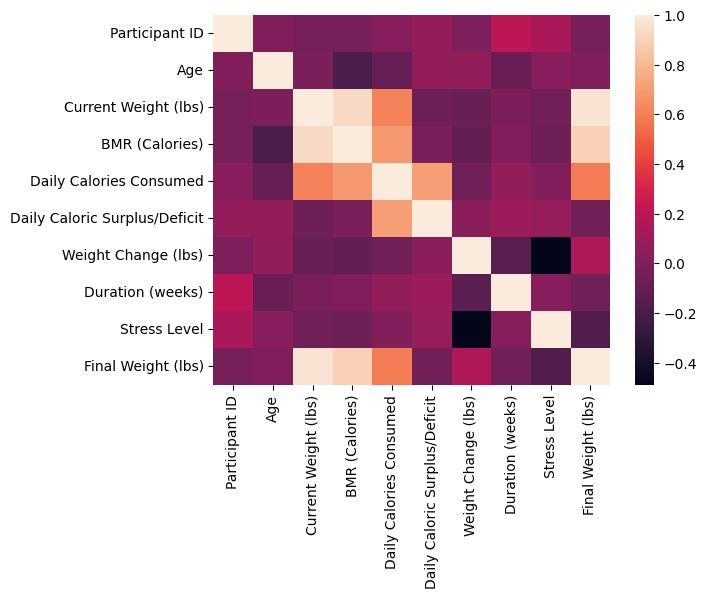

In [9]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr)

In [15]:
df.drop(columns='Participant ID',inplace=True)

In [16]:
cat_cols = df.select_dtypes(include='object')
num_cols = df.select_dtypes(include=['float64','int64'])
cat_cols,num_cols

(   Gender Physical Activity Level Sleep Quality
 0       M               Sedentary     Excellent
 1       F             Very Active     Excellent
 2       F               Sedentary          Good
 3       F               Sedentary          Fair
 4       M          Lightly Active          Good
 ..    ...                     ...           ...
 95      M          Lightly Active     Excellent
 96      F       Moderately Active          Good
 97      F          Lightly Active          Fair
 98      M       Moderately Active          Fair
 99      M             Very Active          Fair
 
 [100 rows x 3 columns],
     Age  Current Weight (lbs)  BMR (Calories)  Daily Calories Consumed  \
 0    56                 228.4          3102.3                   3916.0   
 1    46                 165.4          2275.5                   3823.0   
 2    32                 142.8          2119.4                   2785.4   
 3    25                 145.5          2181.3                   2587.3   
 4    38  

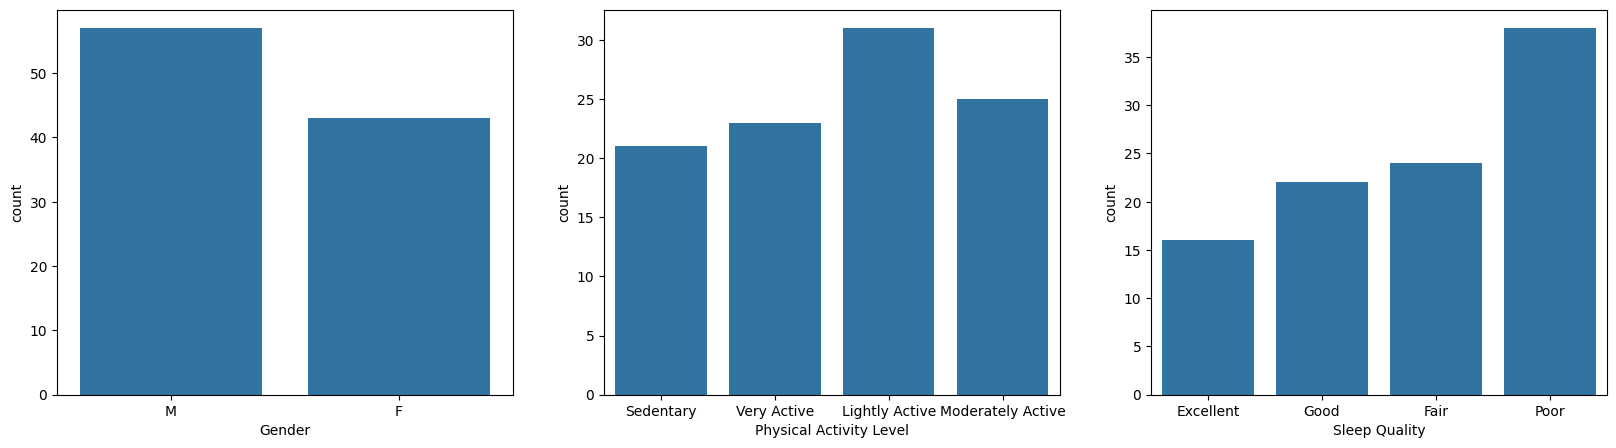

In [26]:
f = 1
plt.figure(figsize=(20,5))
for col in cat_cols:
    plt.subplot(1,3,f)
    sns.countplot(data=df,x=df[col])
    f+=1

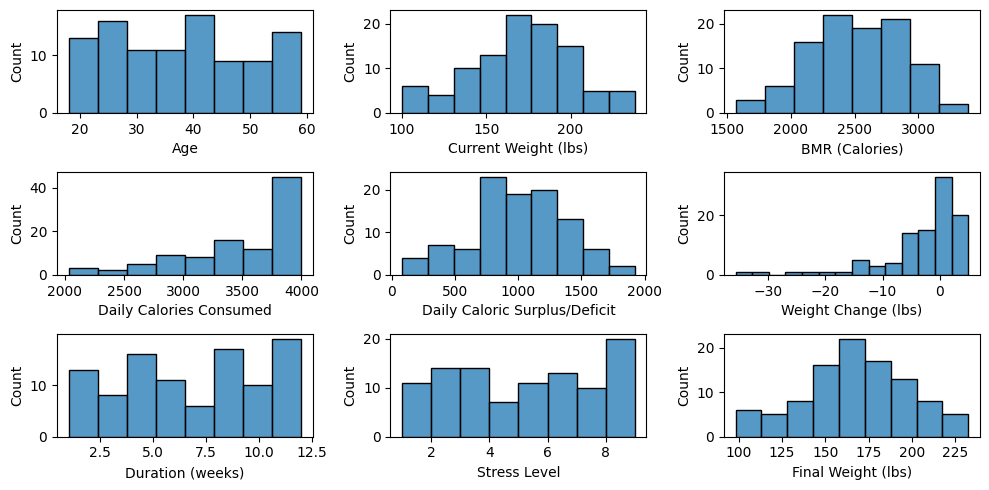

In [36]:
f = 1
plt.figure(figsize=(10,5))
for col in num_cols:
    plt.subplot(3,3,f)
    sns.histplot(data=df,x=df[col])
#     plt.title(col)
    plt.tight_layout()
    f+=1

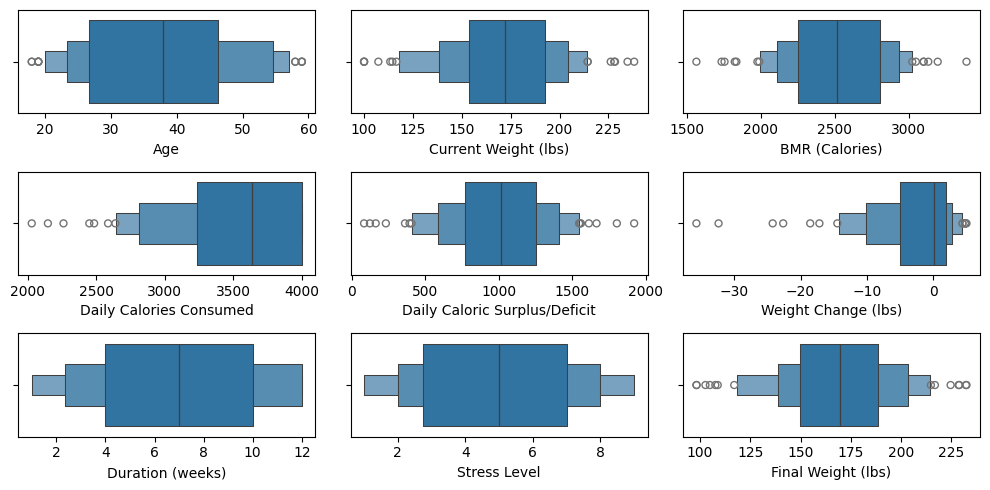

In [34]:
f = 1
plt.figure(figsize=(10,5))
for col in num_cols:
    plt.subplot(3,3,f)
    sns.boxenplot(data=df,x=df[col])
    plt.tight_layout()
    f+=1

LBS to KG

In [57]:
df['Current Weight (kg)'] = df['Current Weight (lbs)'].apply(lambda x: x/2.2).round(2)
df['Weight Change (kg)'] = df['Weight Change (lbs)'].apply(lambda x: x/2.2).round(2)
df['Final Weight (kg)'] = df['Final Weight (lbs)'].apply(lambda x: x/2.2).round(2)
df

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs),Current Weight (kg),Weight Change (kg),Final Weight (kg)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.20000,1,Sedentary,Excellent,6,228.6,103.82,0.09,103.91
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.40000,6,Very Active,Excellent,6,167.8,75.18,1.09,76.27
2,3,32,F,142.8,2119.4,2785.4,666.0,1.40000,7,Sedentary,Good,3,144.2,64.91,0.64,65.55
3,4,25,F,145.5,2181.3,2587.3,406.0,0.80000,8,Sedentary,Fair,2,146.3,66.14,0.36,66.50
4,5,38,M,155.5,2463.8,3312.8,849.0,2.00000,10,Lightly Active,Good,1,157.5,70.68,0.91,71.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,59,M,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3,182.5,82.68,0.27,82.95
96,97,56,F,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9,107.6,52.95,-4.06,48.91
97,98,58,F,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7,166.3,73.95,1.64,75.59
98,99,45,M,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5,181.8,81.73,0.91,82.64
